<a href="https://colab.research.google.com/github/KeerthikaNagarajan/dl-workshop-2/blob/main/DL_Workshop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Write a python code to load the CIFAR-10 dataset

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


**2.** Convert the output to one-hot encoded array

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(50000, 10)

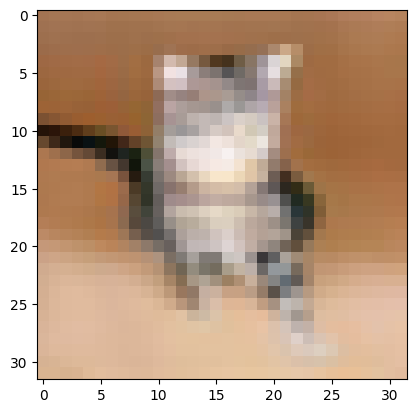

In [ ]:
single_image = X_train[1281]
plt.imshow(single_image,cmap='gray')


In [ ]:
y_train_onehot[1281]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

3. Create a sequential model with appropriate number of neurons in the output layer, activation function and loss function

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(32,32,3)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(180,activation="relu"))
model.add(layers.Dense(125,activation="relu"))
model.add(layers.Dense(175,activation="relu"))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(75,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_17 (Dense)            (None, 180)               1129140   
                                                                 
 dense_18 (Dense)            (None, 125)               22625     
                                                                 
 dense_19 (Dense)            (None, 175)               22050     
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train ,y_train_onehot, epochs=3,
          batch_size=200,
          validation_data=(X_test,y_test_onehot))

Epoch 1/3
250/250 [==============================] - 42s 161ms/step - loss: 2.9563 - accuracy: 0.3346 - val_loss: 1.5858 - val_accuracy: 0.4232
Epoch 2/3
250/250 [==============================] - 41s 165ms/step - loss: 1.4431 - accuracy: 0.4800 - val_loss: 1.4128 - val_accuracy: 0.4864
Epoch 3/3
250/250 [==============================] - 40s 162ms/step - loss: 1.2675 - accuracy: 0.5491 - val_loss: 1.3606 - val_accuracy: 0.5155


4. Plot iteration vs accuracy and iteration vs loss for test and training data

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,2.956340,0.33464,1.585778,0.4232
1,1.443114,0.47998,1.412788,0.4864
2,1.267493,0.54914,1.360575,0.5155


<Axes: >

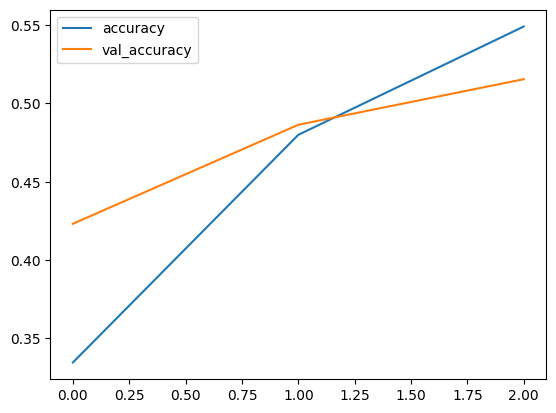

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

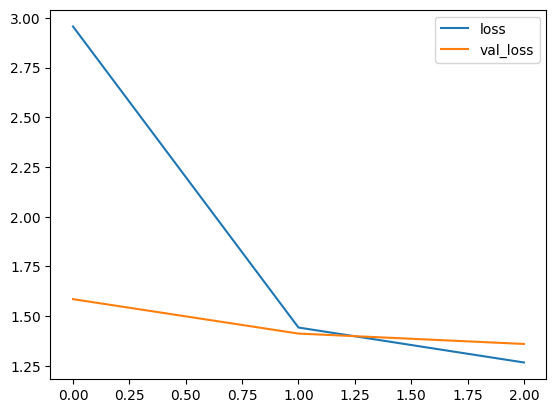

In [ ]:
metrics[['loss','val_loss']].plot()

5. Training the model to get more than 80% accuracy

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[470  37 104  17  26  15  18  29 174 110]
 [  8 709   7   8   1  15   9   3  53 187]
 [ 36  14 385  51 161 109  91  62  56  35]
 [  8  32  77 229  52 337  82  62  33  88]
 [ 21   9 136  46 372  99 124 124  24  45]
 [  8  13 108  99  61 541  41  66  24  39]
 [  4  31  53  68  67  73 583  31  16  74]
 [ 10  11  51  40  51 147  26 558  18  88]
 [110  86  25  10   6  18  11  11 666  57]
 [ 24 191  20   6   2  23   9  16  67 642]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.67      0.47      0.55      1000
           1       0.63      0.71      0.66      1000
           2       0.40      0.39      0.39      1000
           3       0.40      0.23      0.29      1000
           4       0.47      0.37      0.41      1000
           5       0.39      0.54      0.46      1000
           6       0.59      0.58      0.58      1000
           7       0.58      0.56      0.57      1000
           8       0.59      0.67      0.63      1000
           9       0.47      0.64      0.54      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.52      0.52      0.51     10000

